<h1>Classifies patients using ANN</h1>

In [0]:
import glob
from keras.models import Sequential, load_model
from keras.layers import Dense
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [0]:
df = pd.read_csv('kidney_disease.csv')

In [27]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
df.shape

(400, 26)

In [0]:
#Columns to keep
cols = ['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

#Remove columns not in cols
df.drop([col for col in df.columns if not col in cols], axis=1,inplace=True)

#Remove rows with missing values
df = df.dropna(axis=0)

In [0]:
#Transform the non-numeric data in the columns
for column in df.columns:
  #Ignore number values
  if df[column].dtype == np.number:
    continue
  #transform data into numbers
  df[column] = LabelEncoder().fit_transform(df[column])

In [31]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [0]:
#Split data into features/independent/X and dependent/target/response/predicted/y

#Remove target column from feature dataset
X = df.drop(['classification'],axis=1)

#Target column
y = df['classification']

In [0]:
#Feature Scaling
#MinMaxScaler method scales the dataset so that all the input features between 0-1

X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

In [0]:
#Split the data 80% train 20% test (shuffle shuffles data before splitting)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

<h1>Build The Model</h1>

In [0]:
model = Sequential()

#1st layer, 256 neurons, input_dim = # of features
model.add(Dense(256, 
                activation='relu',
                kernel_initializer=keras.initializers.random_normal(seed=13), 
                input_dim=len(X.columns)
                ))

#2nd layer, 1 neuron
model.add(Dense(1,activation='hard_sigmoid'))

In [0]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
#Train the model using training sets, epochs is number of iterations 
#batch_size = number of patients
history = model.fit(X_train, y_train, epochs = 2000, batch_size=X_train.shape[0])




Epoch 1/2000





229/229 [==============================] - 1s 3ms/step - loss: 0.6852 - acc: 0.9083
Epoch 2/2000
229/229 [==============================] - 0s 34us/step - loss: 0.6777 - acc: 0.8777
Epoch 3/2000
229/229 [==============================] - 0s 26us/step - loss: 0.6704 - acc: 0.8734
Epoch 4/2000
229/229 [==============================] - 0s 27us/step - loss: 0.6633 - acc: 0.8734
Epoch 5/2000
229/229 [==============================] - 0s 25us/step - loss: 0.6564 - acc: 0.8690
Epoch 6/2000
229/229 [==============================] - 0s 20us/step - loss: 0.6495 - acc: 0.8690
Epoch 7/2000
229/229 [==============================] - 0s 18us/step - loss: 0.6428 - acc: 0.8690
Epoch 8/2000
229/229 [==============================] - 0s 17us/step - loss: 0.6361 - acc: 0.8690
Epoch 9/2000
229/229 [==============================] - 0s 11us/step - loss: 0.6295 - acc: 0.8690
Epoch 10/2000
229/229 [==============================] - 0s 10us/step - loss: 0.6229 - acc: 0.8690
Epoch 11/200

In [0]:
#Save the model
model.save('ckd.model')

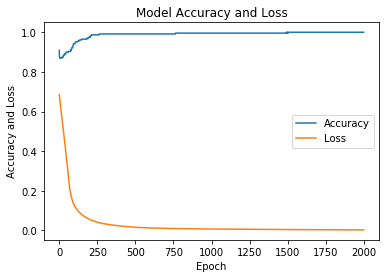

In [49]:
#Visualize the model loss and accuracy
plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend(loc='best')
plt.show()

In [50]:
print('Training Data Shape: ', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape:  (229, 6)
Testing Data Shape:  (58, 6)


In [55]:
#Predict using test data set
prediction = model.predict(X_test)

#Round predictions to 1 or 0
prediction = [1 if y>=0.5 else 0 for y in prediction]

print('Predicted Values: ',prediction)

#Actual values
print('Actual Values: ',list(y_test))

Predicted Values:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
Actual Values:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
